# Random Walks
The simulation of random walks provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

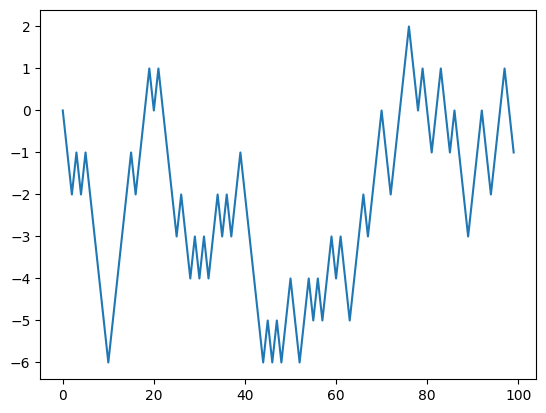

In [1]:
import random
import matplotlib.pyplot as plt


position = 0
walk = [position]
n_steps = 1000
for _ in range(n_steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

# Plotting first 100 values
plt.plot(walk[0:100])

In [2]:
# You might make the observation that walk is the cumulative sum of the random steps and could be evaluated as an array expression. 
# Thus, I use the numpy.random module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:
import numpy as np

n_steps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=n_steps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [5]:
# From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:
print(f"Minimum steps: {walk.min()}")
print(f"Maximum steps: {walk.max()}")

Minimum steps: -8
Maximum steps: 50


A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. np.abs(walk) >= 10 gives us a Boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using argmax, which returns the first index of the maximum value in the Boolean array (True is the maximum value):

In [6]:
print((np.abs(walk) >=10).argmax())

155


# Simulating Many Random Walks at Once
If your goal was to simulate many random walks, say five thousand of them, you can generate all of the random walks with minor modifications to the preceding code. If passed a 2-tuple, the numpy.random functions will generate a two-dimensional array of draws, and we can compute the cumulative sum for each row to compute all five thousand random walks in one shot:

In [7]:
n_walks = 5000
n_steps = 1000
draws = rng.integers(0,2, size=(n_walks, n_steps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]], shape=(5000, 1000))

In [8]:
print(walks.min())
print(walks.max())

-120
114


Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is slightly tricky because not all 5,000 of them reach 30. We can check this using the any method:

In [10]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
print(hits30.sum())

3395


We can use this Boolean array to select the rows of walks that actually cross the absolute 30 level, and call argmax across axis 1 to get the crossing times:

In [12]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
print(crossing_times.mean())

500.5699558173785
